# Importing needful libraries and modules

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #For splitting the data into train & test
from sklearn.linear_model import LinearRegression #Linear regression model
from sklearn.metrics import mean_squared_error #Metric for regression MSE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm #For regression with statmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor #For VIF
import pylab as py

In [2]:
data=pd.read_csv(r"C:\R DATA SETS\Boston.CSV")
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Seperating independent data matrix & response vector

In [7]:
x=data.iloc[:,:12].values
y=data.iloc[:,12].values

# Splitting data into training & testing sets (Validation set approach)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Creating a linear regression model object

In [9]:
model=LinearRegression()

# Training the model with training data

In [44]:
model.fit(x_train,y_train)

LinearRegression()

# Estimated model parameters for independent variables

In [64]:
model.coef_

array([-1.25156811e-01,  4.48575121e-02,  2.01265385e-02, -1.62895522e+01,
        3.77366409e+00, -2.13185120e-03, -1.40611846e+00,  2.66835482e-01,
       -1.21692284e-02, -1.07660161e+00,  8.72533635e-03, -4.94425348e-01])

# Intercept of the model

In [65]:
model.intercept_

38.42706211257596

# R-Squared value for the trained model

In [66]:
model.score(x_train,y_train)*100

76.90953567794607

# Predicting the response for the unseen testing independent data

In [67]:
y_pred=model.predict(x_test)

# Mean Squared Error for the testing data

In [68]:
MSE=mean_squared_error(y_pred,y_test)
MSE

34.21225254753322

# Root Mean Squared Error

In [69]:
np.sqrt(MSE)

5.849124083786667

# Checking Linear Regression Assumptions

# Multicolinearity

In [70]:
print(variance_inflation_factor(x_train,0))
print(variance_inflation_factor(x_train,1))
print(variance_inflation_factor(x_train,2))

2.095893706813608
2.9280622564794707
13.829768274867487


In [71]:
vif_values=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]

In [72]:
df_VIF=pd.DataFrame({"Features":data.iloc[:,:12].columns,"VIF":vif_values})

In [73]:
df_VIF

,Features,VIF
0,crim,2.095894
1,zn,2.928062
2,indus,13.829768
3,nox,80.580602
4,rm,80.295207
5,age,22.821527
6,dis,14.784871
7,rad,14.694806
8,tax,57.284635
9,ptratio,87.191073


# Normality of Residuals

In [74]:
residuals=y_test-y_pred

In [75]:
residuals

array([ -2.20502192,  26.00792122,  -4.41969853,  -3.92521383,
        -0.34089609,   0.59497706,  -0.10506397,  -2.795484  ,
        -2.84490741,  -1.19344825,   4.04021025,   0.7656902 ,
        -2.39081528,   4.85281105,  11.84611837,  -3.57410093,
         0.29620354,  -3.71957565,  -1.65648795,  -2.25919894,
        -1.12104056,  -5.89282993,  -0.24411415,  -1.46600209,
        -3.25400948,  12.931367  ,   1.89174083,   0.90203503,
         2.92804583,  -2.38709139,  -3.9413341 ,   1.98068857,
         0.46208448,  -4.13016879,  -5.74270932,  -0.34453905,
        -5.69301586,  27.53699401,  -3.15919302,  -2.39991479,
        -2.56863641,  -0.99738044,  -2.4127374 ,  -1.98922293,
        -6.40368303,  -3.77354909,  -0.066435  ,  -3.84948352,
         1.52837628,   3.13349311,  -3.12120276,   5.7277916 ,
        -0.44428345,  12.7084621 ,   2.14316522,  -0.19909332,
        -3.67900494,   1.82096906,   1.23251172,   1.6400027 ,
         1.1110786 ,  -0.74283257,  -0.03151667,   0.15

C:\Users\DELL\AppData\Local\Temp\ipykernel_2404\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

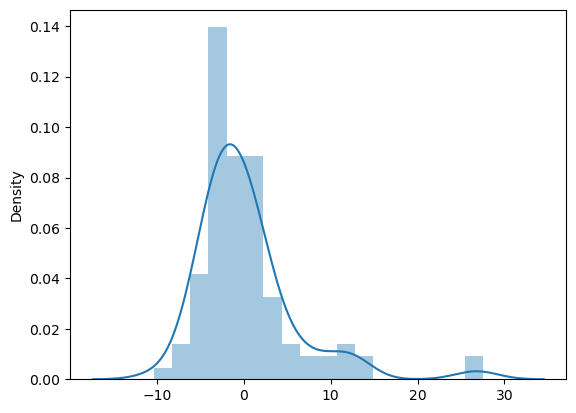

In [76]:
sns.distplot(residuals)

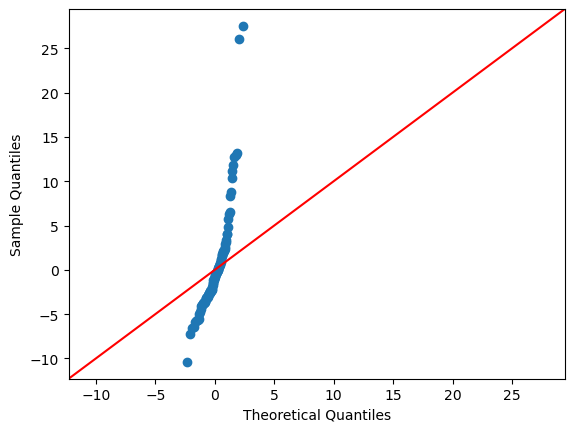

In [77]:
sm.qqplot(residuals,line="45")
py.show()

# Homoscedasticity & Residual Independency

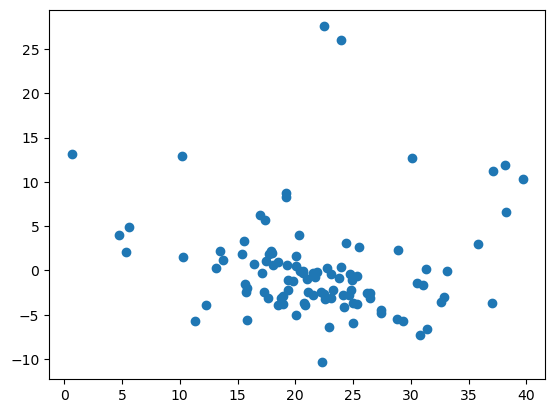

In [78]:
plt.scatter(y_pred,residuals)
plt.show()

# Inference in Regression

In [79]:
x_with_constant=sm.add_constant(x_train)

In [80]:
model_sm=sm.OLS(y_train,x_with_constant)

In [81]:
result=model_sm.fit()

In [82]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     108.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          2.48e-116
Time:                        17:59:12   Log-Likelihood:                -1174.9
No. Observations:                 404   AIC:                             2376.
Df Residuals:                     391   BIC:                             2428.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4271      5.561      6.910      0.0